<a href="https://colab.research.google.com/github/manirajanvn/dl_colabs/blob/main/icevision_sahi_yolox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 master

--2022-02-21 14:51:48--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘icevision_install.sh.1’

icevision_install.s 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-02-21 14:51:48 (40.1 MB/s) - ‘icevision_install.sh.1’ saved [2691/2691]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
- Installing mmdet
- Installing icevision from master
- Installing icedata from master
icevision installation finished!


In [3]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
BASE_DIR = "/content/gdrive/MyDrive/ColabNotebooks/fire_smoke_dataset/fire_coco/coco128"

In [3]:
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [4]:
# Create the parser
train_parser = parsers.COCOBBoxParser(annotations_filepath=BASE_DIR+"/annotations/instances_train2017.json", img_dir=BASE_DIR+"/train2017")

In [5]:
data_splitter = RandomSplitter([0.8, 0.2])


In [6]:
train_records, valid_records = train_parser.parse(data_splitter)


  0%|          | 0/1155 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/818 [00:00<?, ?it/s]

In [7]:
train_parser.class_map

<ClassMap: {'background': 0, 'Fire': 1, 'Smoke': 2}>

In [8]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

In [9]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [15]:
#model_type = models.mmdet.yolox
#backbone = model_type.backbones.yolox_s_8x8
model_type = models.mmdet.vfnet
backbone = model_type.backbones.resnet50_fpn_mstrain_2x

In [16]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(train_parser.class_map)) 


  0%|          | 0/131902412 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2022-02-21 15:17:17,479 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-02-21 15:17:17,481 - mmcv - INFO - load model from: torchvision://resnet50
2022-02-21 15:17:17,485 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

2022-02-21 15:17:18,890 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-02-21 15:17:18,927 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-02-21 15:17:18,964 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2022-02-21 15:17:19,017 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-02-21 15:17:19,020 - mmcv - INFO - 
backbone.bn1.weight - torch.Size([64]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-02-21 15:17:19,023 - mmcv - INFO - 
backbone.bn1.bias - torch.Size([64]): 
PretrainedInit: load from torchvision://resnet50 
 
2022-02-21 15:17:19,028 - mmcv - INFO - 
backbone.layer1.0.conv1.weight - torch.Size([64, 

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([2, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([2]).


In [17]:
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [18]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [19]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


SuggestedLRs(valley=0.00013182566908653826)

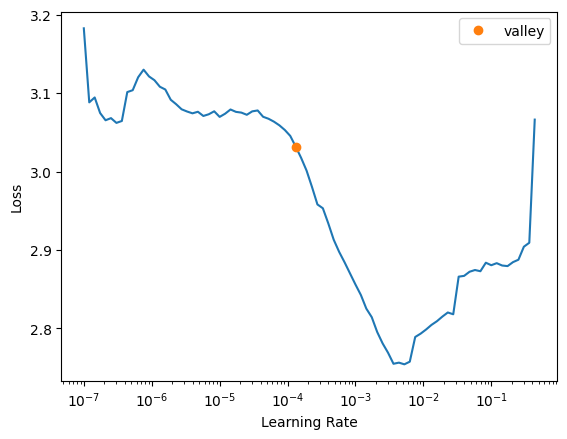

In [20]:
learn.lr_find()

In [21]:
learn.fine_tune(5, 0.000131, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,2.324224,1.968446,0.156822,01:48


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


epoch,train_loss,valid_loss,COCOMetric,time
0,1.829894,1.781935,0.250807,01:59
1,1.743069,1.675001,0.345439,01:55
2,1.644082,1.589002,0.400937,01:56
3,1.563467,1.543169,0.437981,01:55
4,1.526770,1.528483,0.450025,01:55


In [25]:
from icevision.all import *
from icevision.models.inference_sahi import IceSahiModel
from icevision.models import *

In [23]:
 train_parser.class_map.get_classes()

['background', 'Fire', 'Smoke']

In [27]:
checkpoint_path = BASE_DIR+'/coco-vfnet-checkpoint-full.pth'

save_icevision_checkpoint(model, 
                        model_name='mmdet.vfnet', 
                        backbone_name='resnet50_fpn_mstrain_2x',
                        classes =  train_parser.class_map.get_classes(), 
                        img_size=image_size, 
                        filename=checkpoint_path,
                        meta={'icevision_version': '0.9.1'})

In [28]:
#checkpoint_path = 'coco-retinanet-checkpoint-full.pth'
checkpoint_and_model = model_from_checkpoint(checkpoint_path)

load checkpoint from local path: /content/gdrive/MyDrive/ColabNotebooks/fire_smoke_dataset/fire_coco/coco128/coco-vfnet-checkpoint-full.pth


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2022-02-21 15:35:39,932 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-02-21 15:35:39,934 - mmcv - INFO - load model from: torchvision://resnet50
2022-02-21 15:35:39,936 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-02-21 15:35:40,043 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-02-21 15:35:40,086 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-02-21 15:35:40,122 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'No

In [30]:
model_type = checkpoint_and_model["model_type"]
backbone = checkpoint_and_model["backbone"]
class_map = checkpoint_and_model["class_map"]
img_size = checkpoint_and_model["img_size"]
model = checkpoint_and_model["model"]

In [31]:
sahimodel = IceSahiModel(model_type=model_type, model=model, class_map=train_parser.class_map, tfms=valid_tfms, confidence_threshold=0.4)


Performing prediction on 18 number of slices.


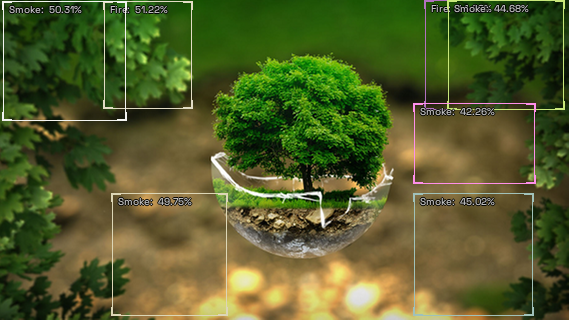

In [37]:
pred = sahimodel.get_sliced_prediction(
                "7.png",
                keep_sahi_format=False,
                return_img=True,
                slice_height = 128,
                slice_width = 128,
                overlap_height_ratio = 0.2,
                overlap_width_ratio = 0.2,
            )
pred['img']